In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

pd.set_option('display.max_rows', 10)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [171]:
hotel = pd.read_csv('train (1).csv') # Loading the file

print(hotel.head()) # Viewing the date and first rows

           id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28          20090319043255                NaN   
1  820tgsjxq7           2011-05-25          20090523174809                NaN   
2  4ft3gnwmtx           2010-09-28          20090609231247         2010-08-02   
3  bjjt8pjhuk           2011-12-05          20091031060129         2012-09-08   
4  87mebub9p4           2010-09-14          20091208061105         2010-02-18   

      gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app 

In [172]:
print(hotel.shape)

(213451, 16)


In [173]:
print(hotel.keys())

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')


In [174]:
print(hotel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [175]:
# Look up for null total of null values in the date set

print(hotel.isnull().sum())

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
                            ...  
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
Length: 16, dtype: int64


In [176]:
# Check for percentage of null values in the data set

nan_info = pd.DataFrame(hotel.isnull().sum()).reset_index()
nan_info.columns = ['feature_name','nan_cnt']
nan_info.sort_values(by = 'nan_cnt',ascending=False,inplace=True)
nan_info['nan_percentage'] = nan_info['nan_cnt']/len(hotel)
print(nan_info)

               feature_name  nan_cnt  nan_percentage
3        date_first_booking   124543        0.583473
5                       age    87990        0.412226
11  first_affiliate_tracked     6065        0.028414
0                        id        0        0.000000
1      date_account_created        0        0.000000
..                      ...      ...             ...
10       affiliate_provider        0        0.000000
12               signup_app        0        0.000000
13        first_device_type        0        0.000000
14            first_browser        0        0.000000
15      country_destination        0        0.000000

[16 rows x 3 columns]


 We will explore each category from the booking and make the data is clean.

# GENDER

In [177]:
print(hotel.gender.describe())
print()
print(hotel['gender'].unique()) # Unique values
print()
print(hotel['gender'].value_counts(normalize=True)) # Displaying the value distribution

count        213451
unique            4
top       -unknown-
freq          95688
Name: gender, dtype: object

['-unknown-' 'MALE' 'FEMALE' 'OTHER']

-unknown-    0.448290
FEMALE       0.295342
MALE         0.255047
OTHER        0.001321
Name: gender, dtype: float64


In [178]:
# Replace -unknown- to a more standardised value

hotel['gender'] = hotel['gender'].str.replace('-unknown-','unknown')
print(hotel['gender'].unique())
print()

['unknown' 'MALE' 'FEMALE' 'OTHER']



In [179]:
# Unknown and other goes under one category since, they are both 'unknown'

hotel['gender'] = hotel['gender'].str.replace('unknown','other')
print(hotel['gender'].unique())
print()

['other' 'MALE' 'FEMALE' 'OTHER']



In [180]:
hotel['gender'] = hotel['gender'].str.lower()
print(hotel['gender'].unique())
print()
print(hotel['gender'].value_counts(normalize=True))
print()

['other' 'male' 'female']

other     0.449611
female    0.295342
male      0.255047
Name: gender, dtype: float64



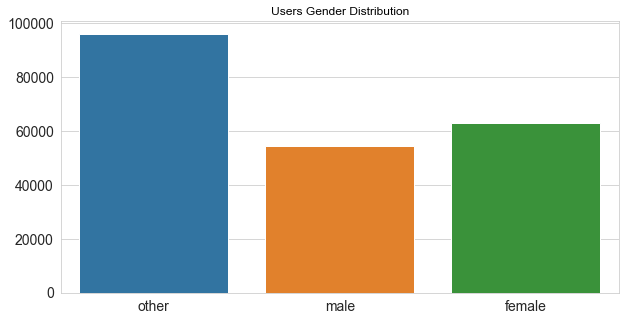

In [181]:
# Let's see the distribution of categories

plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=hotel)
plt.ylabel('')
plt.xlabel('')
plt.title('Users Gender Distribution', color='black')
plt.xticks(size=14)
plt.yticks(size=14)

plt.show()

# AGE

In [182]:
print(hotel['age'].describe())
print()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64



Text(0.5, 1.0, 'Age Distribution')

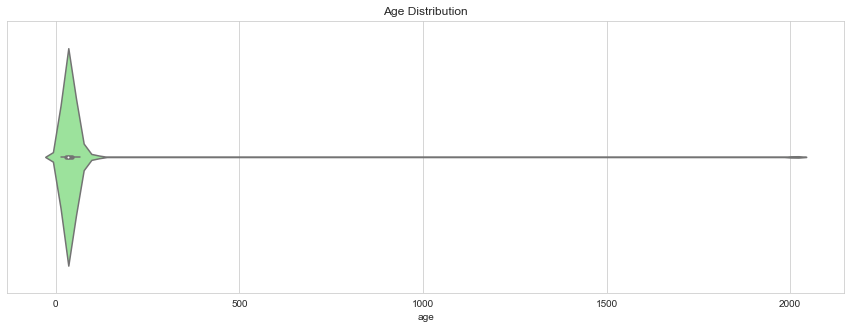

In [183]:
# Seems there are some incorrect values with maximum age as 2014

feature = 'age'
fig = plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace = 0.5)
sns.violinplot(hotel[feature], color='lightgreen')
plt.title('Age Distribution'.format(feature))

In [184]:
print('Number of NaN values under age', hotel.age.isnull().sum())

Number of NaN values under age 87990


In [185]:
# Let's have look at the amount of values that are over 100years

print(hotel.loc[hotel['age']>100]['age'].describe())
print()

count    2345.000000
mean      738.697655
std       897.655359
min       101.000000
25%       105.000000
50%       105.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64



In [186]:
# The minimum value is to be set for 18 as a legal age, so any users under 18years
# will not be included

print(hotel.loc[hotel['age']<18]['age'].describe())
print()

count    158.000000
mean      12.202532
std        5.916359
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64



In [187]:
# Replacing non valid values with nan, increasing nan to 90492

hotel.loc[hotel['age'] > 100, 'age'] = np.nan
hotel.loc[hotel['age'] < 18, 'age'] = np.nan
print(hotel['age'].isnull().sum())
print()
hotel['age'].describe()
print()

90493




In [188]:
# To better understand the age data

mean_before_filling = hotel['age'].mean()
print(hotel['age'].mean())
print()
print(hotel['age'].median())
print()

36.57561931716521

34.0



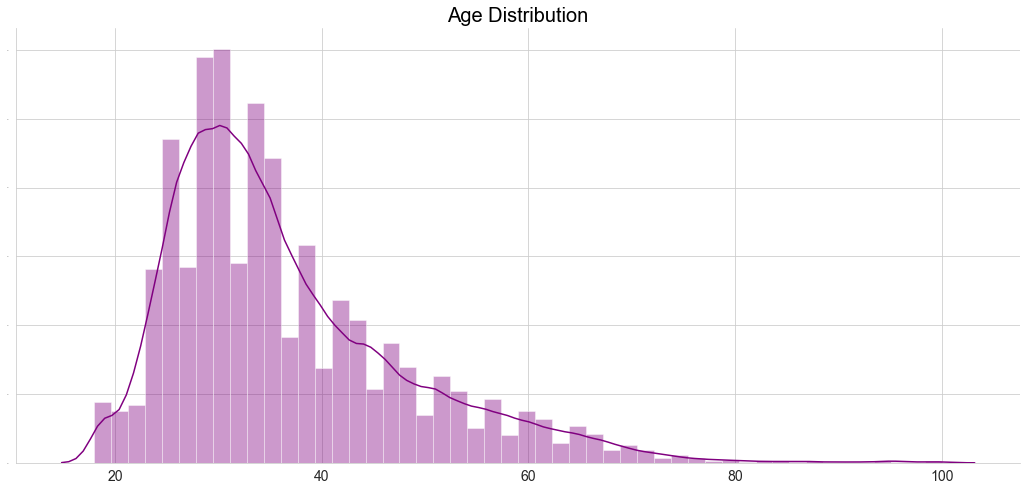

In [189]:
# Let us see the age distribution

plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
sns.distplot(hotel.age, color='purple')
sns.despine()
plt.ylabel('')
plt.xlabel('')
plt.title('Age Distribution', size=20, color='black')
plt.xticks(size= 14)
plt.yticks(size=0.1)

plt.show()

In [190]:
# According to the skewed distribution I decided  replace the missing value with median value

hotel['age'] = hotel['age'].fillna(hotel.age.median())
print(hotel['age'].isnull().sum())
print()

0



In [191]:
# For understanding of the effect of the change
mean_after_filling = hotel['age'].mean()
print("The value of mean after filling method changed by", mean_before_filling - mean_after_filling)
print()
print("While the median has not changed", hotel['age'].median())
print()

The value of mean after filling method changed by 1.0919392219677206

While the median has not changed 34.0



In [192]:
# Again to see for the effect of the change

mean_after_filling = hotel['age'].mean()
print("The value of mean after filling method changed by", mean_before_filling - mean_after_filling)
print()
print("While the median has not changed", hotel['age'].median())
print()

The value of mean after filling method changed by 1.0919392219677206

While the median has not changed 34.0



In [193]:
# Let's have a look at the values

print(hotel['age'].value_counts())

34.0    95522
30.0     6124
31.0     6016
29.0     5963
28.0     5939
        ...  
89.0       13
88.0       12
94.0       12
91.0       12
97.0       10
Name: age, Length: 83, dtype: int64


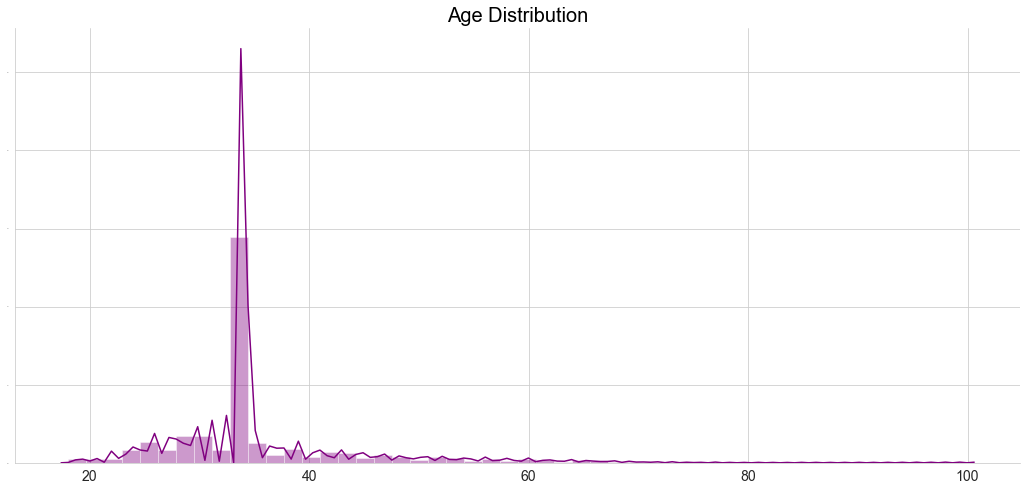

In [194]:
#A visualization

plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
sns.distplot(hotel.age, color='purple')
sns.despine()
plt.ylabel('')
plt.xlabel('')
plt.title('Age Distribution', size=20, color='black')
plt.xticks(size= 14)
plt.yticks(size=0.1)

plt.show()

# TIMESTAMP FIRST ACTIVE

In [195]:
print(hotel.timestamp_first_active.head())
print()

0    20090319043255
1    20090523174809
2    20090609231247
3    20091031060129
4    20091208061105
Name: timestamp_first_active, dtype: int64



In [196]:
# The time stamp comes with hour, minutes, etc. we are going to convert them and discart
# unnecessary values

hotel['timestamp_first_active'] = pd.to_datetime((hotel['timestamp_first_active'])//1000000, format='%Y%m%d')
print(hotel['timestamp_first_active'].head())
print()
print(hotel['timestamp_first_active'].describe())
print()

0   2009-03-19
1   2009-05-23
2   2009-06-09
3   2009-10-31
4   2009-12-08
Name: timestamp_first_active, dtype: datetime64[ns]

count                  213451
unique                   1639
top       2014-05-13 00:00:00
freq                      673
first     2009-03-19 00:00:00
last      2014-06-30 00:00:00
Name: timestamp_first_active, dtype: object



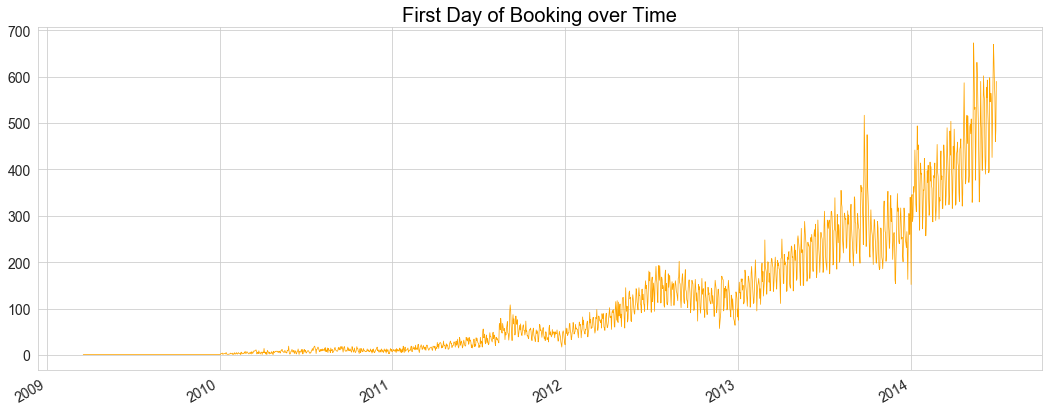

In [197]:
#A visualization

plt.figure(figsize=(18,7))
hotel.timestamp_first_active.value_counts().plot(kind='line', linewidth=0.75, color='orange')
plt.xlabel('')
plt.title('First Day of Booking over Time',color='black', size=20)
plt.xticks(size= 14)
plt.yticks(size= 14)

plt.show()

# DATE ACCOUNT CREATED

In [198]:
print(hotel['date_account_created'].head())
print()

0    2010-06-28
1    2011-05-25
2    2010-09-28
3    2011-12-05
4    2010-09-14
Name: date_account_created, dtype: object



In [199]:
# Conversion to a appropriate data type

hotel['date_account_created'] = pd.to_datetime(hotel['date_account_created'])
hotel['date_account_created'].head()

0   2010-06-28
1   2011-05-25
2   2010-09-28
3   2011-12-05
4   2010-09-14
Name: date_account_created, dtype: datetime64[ns]

In [200]:
# Check for null values

print(hotel['date_account_created'].isnull().sum())
print()

0



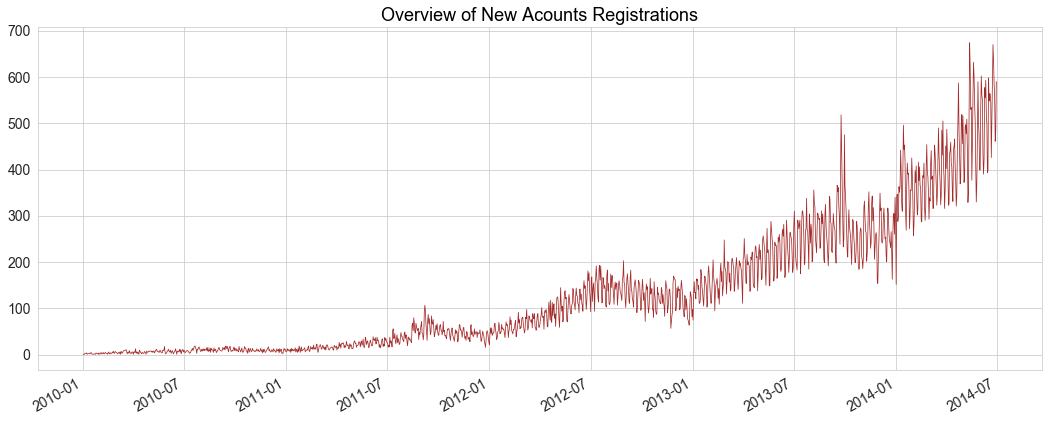

In [201]:
#A visualization

plt.figure(figsize=(18,7))
hotel['date_account_created'].value_counts().plot(kind='line', linewidth=0.75, color='brown')
plt.ylabel('')
plt.xlabel('')
plt.title('Overview of New Acounts Registrations',color='black', size=18)
plt.xticks(size= 14)
plt.yticks(size= 14)

plt.show()

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.]),
 <a list of 10 Text yticklabel objects>)

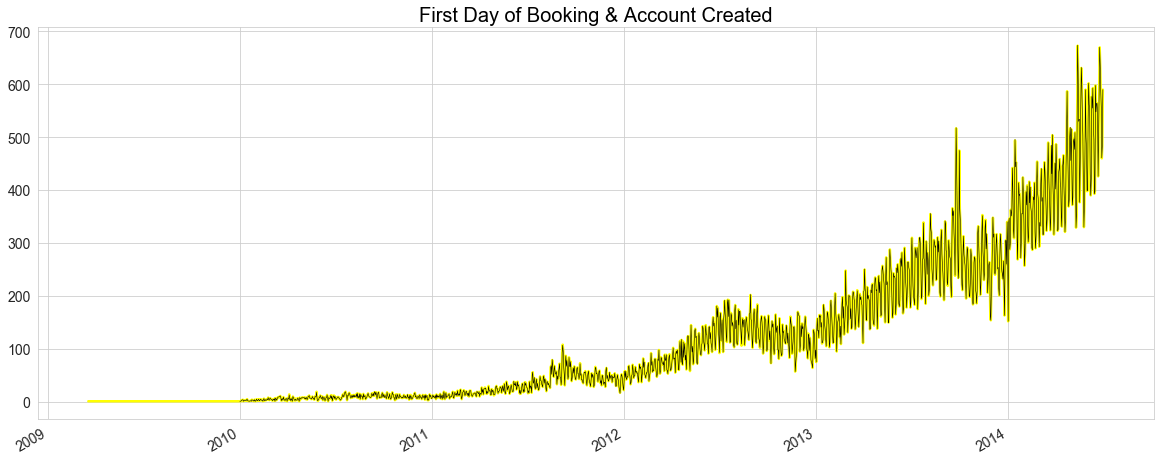

In [202]:
#A visualization of First Day of Booking & Account Created, the both dates seem to
# very similar

plt.figure(figsize=(20,8))
hotel.timestamp_first_active.value_counts().plot(kind='line', linewidth=2.5, color='yellow')
hotel.date_account_created.value_counts().plot(kind='line', linewidth=0.55, color='black')
plt.title('First Day of Booking & Account Created',color='black', size=20)
plt.xticks(size= 14)
plt.yticks(size= 14)
#plt.show()

# DATE FIRST BOOKING

In [203]:
print(hotel['date_first_booking'].describe())
print(hotel['date_first_booking'].isnull().sum())
print()

count          88908
unique          1976
top       2014-05-22
freq             248
Name: date_first_booking, dtype: object
124543



In [204]:
# Filling missing values, prep for interpolate()
hotel['date_first_booking'].fillna(value=0)

0                  0
1                  0
2         2010-08-02
3         2012-09-08
4         2010-02-18
             ...    
213446             0
213447             0
213448             0
213449             0
213450             0
Name: date_first_booking, Length: 213451, dtype: object

In [205]:
# Since there are some missing values in date, the used method is:
# ‘pad’: Fill in NaNs using existing values

hotel['date_first_booking'] = hotel['date_first_booking'].interpolate(method='pad', limit=25)
print(hotel['date_first_booking'].isnull().sum())
print()
print(hotel['date_first_booking'].head())

2

0           NaN
1           NaN
2    2010-08-02
3    2012-09-08
4    2010-02-18
Name: date_first_booking, dtype: object


In [206]:
# Dropping the first two values of the data frame
# since it was not possible to extrapolate

hotel.drop(hotel.head(2).index, inplace=True)
print(hotel['date_first_booking'].head())

2    2010-08-02
3    2012-09-08
4    2010-02-18
5    2010-01-02
6    2010-01-05
Name: date_first_booking, dtype: object


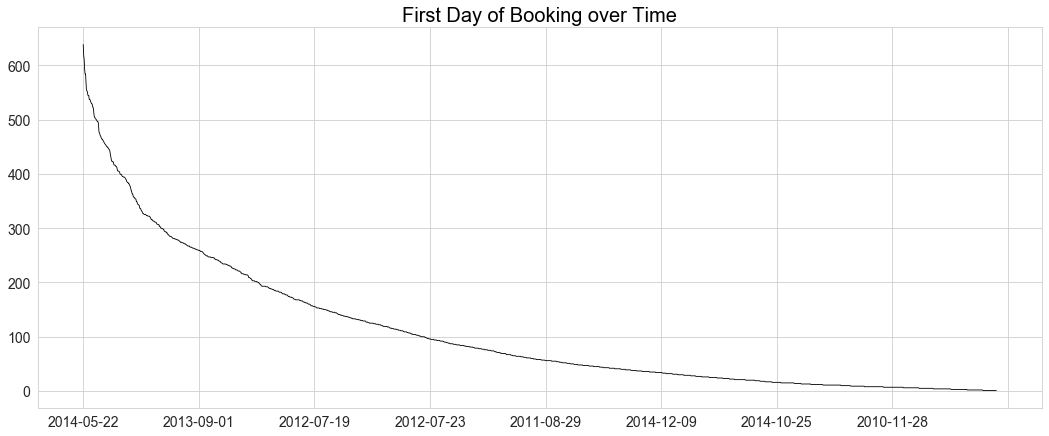

In [207]:
# A visualization

plt.figure(figsize=(18,7))
hotel.date_first_booking.value_counts().plot(kind='line', linewidth=0.85, color='black')
plt.xlabel('')
plt.title('First Day of Booking over Time',color='black', size=20)
plt.xticks(rotation=0,size= 14)
plt.yticks(size= 14)

plt.show()

# SIGNUP METHOD

In [208]:
# These are the unique values
print(hotel.signup_method.unique())
print()
print(hotel['signup_method'].describe())

['basic' 'facebook' 'google']

count     213449
unique         3
top        basic
freq      152897
Name: signup_method, dtype: object


In [209]:
# Displaying the value distribution

print(hotel['signup_method'].value_counts())

basic       152897
facebook     60006
google         546
Name: signup_method, dtype: int64


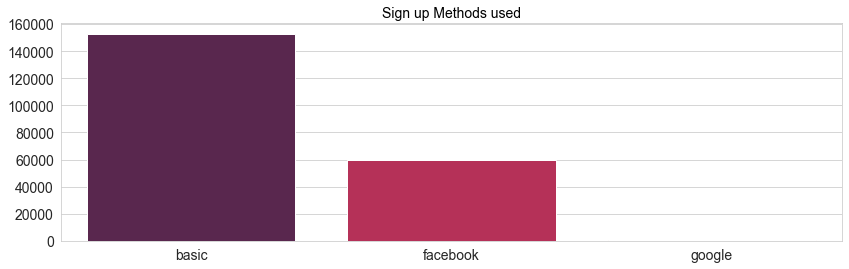

In [210]:
# A visualization

plt.figure(figsize=(14,4))
sns.countplot(x='signup_method', data=hotel, palette="rocket")
plt.ylabel('')
plt.xlabel('')
plt.title('Sign up Methods used', color='black',size= 14)
plt.xticks(size= 14)
plt.yticks(size= 14)

plt.show()

# SIGNUP FLOW

In [211]:
print(hotel['signup_flow'].head())

2    3
3    0
4    0
5    0
6    0
Name: signup_flow, dtype: int64


In [212]:
# These are the unique values

print(hotel.signup_flow.unique())

[ 3  0  2  1 24  8  6  5 10 25 12  4 16 15 20 21 23]


In [213]:
print(hotel['signup_flow'].describe())

count    213449.000000
mean          3.267418
std           7.637736
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          25.000000
Name: signup_flow, dtype: float64


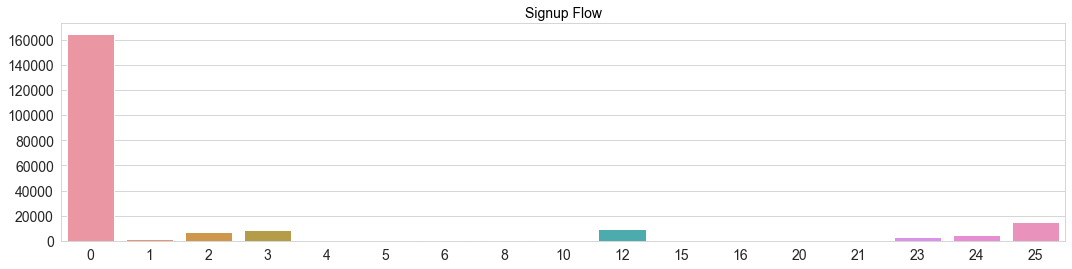

In [214]:
# A visualization

plt.figure(figsize=(18,4))
sns.countplot(x='signup_flow', data=hotel)
plt.ylabel('')
plt.xlabel('')
plt.title('Signup Flow', color='black',size= 14)
plt.xticks(size= 14)
plt.yticks(size= 14)

plt.show()

# LANGUAGE

In [215]:
print(hotel['language'].head())

2    en
3    en
4    en
5    en
6    en
Name: language, dtype: object


In [216]:
# These are the unique values

print(hotel['language'].unique())

['en' 'fr' 'de' 'es' 'it' 'pt' 'zh' 'ko' 'ja' 'ru' 'pl' 'el' 'sv' 'nl'
 'hu' 'da' 'id' 'fi' 'no' 'tr' 'th' 'cs' 'hr' 'ca' 'is']


In [217]:
print(hotel['language'].value_counts(normalize=True))


en    0.966563
zh    0.007646
fr    0.005491
es    0.004287
ko    0.003500
        ...   
hu    0.000084
fi    0.000066
is    0.000023
ca    0.000023
hr    0.000009
Name: language, Length: 25, dtype: float64


# AFFILIATE CHANNEL

In [218]:
print(hotel['affiliate_channel'].head())

2    direct
3    direct
4    direct
5     other
6     other
Name: affiliate_channel, dtype: object


In [219]:
# A look at the distribution

print(hotel['affiliate_channel'].value_counts(normalize=True))

direct           0.645241
sem-brand        0.122020
sem-non-brand    0.088283
other            0.041982
seo              0.040581
api              0.038262
content          0.018496
remarketing      0.005135
Name: affiliate_channel, dtype: float64


In [220]:
# Those categories that are in such low count will be simplified
# and put under 'other' since their significant is extremely low

channel_dictionary = {'seo':'other', 'api':'other','content':'other','remarketing':'other'}
hotel['affiliate_channel'] = hotel['affiliate_channel'].replace(channel_dictionary)
print(hotel['affiliate_channel'].unique())

['direct' 'other' 'sem-non-brand' 'sem-brand']


In [221]:
print(hotel['affiliate_channel'].describe())

count     213449
unique         4
top       direct
freq      137726
Name: affiliate_channel, dtype: object


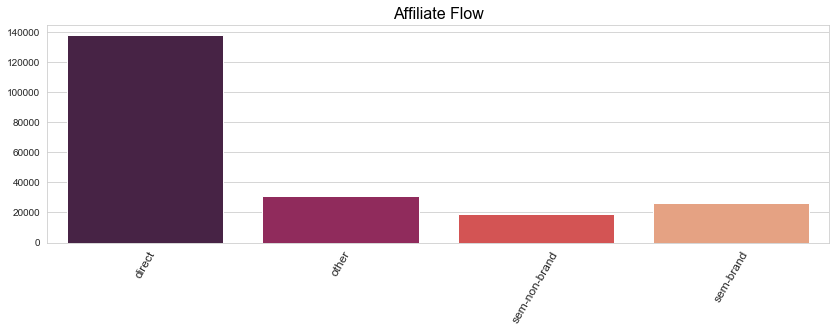

In [222]:
plt.figure(figsize=(14,4))
sns.countplot(x='affiliate_channel', data=hotel, palette='rocket')
plt.ylabel('')
plt.xlabel('')
plt.title('Affiliate Flow', color='black',size=16)
plt.xticks(rotation=60, size= 12)

plt.show()

# AFFILIATE PROVIDER

In [223]:
print(hotel['affiliate_provider'].unique())

['direct' 'other' 'craigslist' 'facebook' 'google' 'vast' 'bing' 'meetup'
 'facebook-open-graph' 'email-marketing' 'yahoo' 'padmapper' 'gsp' 'wayn'
 'naver' 'baidu' 'yandex' 'daum']


In [224]:
print(hotel['affiliate_provider'].describe())

count     213449
unique        18
top       direct
freq      137425
Name: affiliate_provider, dtype: object


In [225]:
# An insight in the data distribution

print(hotel['affiliate_provider'].value_counts())

direct        137425
google         51692
other          12549
craigslist      3471
bing            2328
               ...  
naver             52
baidu             29
yandex            17
wayn               8
daum               1
Name: affiliate_provider, Length: 18, dtype: int64


In [226]:
# Simplification of values that are in low counts and put under the category as 'other'

provider_dictionary = {'vast':'other', 'meetup':'other', 'facebook-open-graph':'other',
                      'padmapper':'other','gsp':'other', 'wayn':'other', 'naver':'other',
                      'baidu':'other', 'yandex':'other','daum':'other','email-marketing':'other',
                      'email-marketing':'other', 'yahoo':'other'}

hotel['affiliate_provider'] = hotel['affiliate_provider'].replace(provider_dictionary)
print(hotel['affiliate_provider'].unique())

['direct' 'other' 'craigslist' 'facebook' 'google' 'bing']


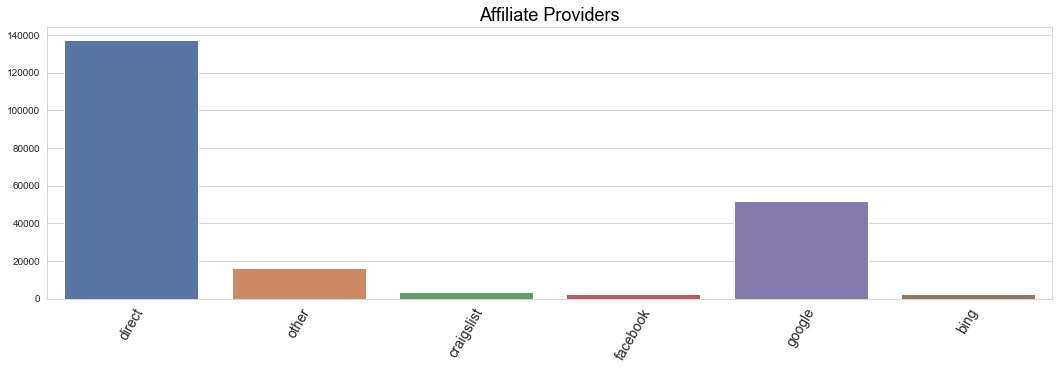

In [227]:
plt.figure(figsize=(18,5))
sns.countplot(x='affiliate_provider', data=hotel, palette='deep')
plt.ylabel('')
plt.xlabel('')
plt.title('Affiliate Providers', color='black', size=18)
plt.xticks(rotation=60, size= 14)

plt.show()

# FIRST AFFILIATE

In [228]:
print(hotel['first_affiliate_tracked'].head())

2    untracked
3    untracked
4    untracked
5          omg
6    untracked
Name: first_affiliate_tracked, dtype: object


In [229]:
print('There are', hotel['first_affiliate_tracked'].isnull().sum(), 'missing values' )


There are 6065 missing values


In [230]:
# Unique values

print(hotel['first_affiliate_tracked'].unique())
print()
print(hotel['first_affiliate_tracked'].describe())

['untracked' 'omg' nan 'linked' 'tracked-other' 'product' 'marketing'
 'local ops']

count        207384
unique            7
top       untracked
freq         109230
Name: first_affiliate_tracked, dtype: object


In [231]:
# The NaN value will fall under untracked since the meaning is the same

hotel['first_affiliate_tracked'] = hotel['first_affiliate_tracked'].fillna(value='untracked')
print(hotel['first_affiliate_tracked'].isnull().sum())

0


In [232]:
# Viewing the data distribution

print(hotel['first_affiliate_tracked'].value_counts(normalize=True))

untracked        0.540152
linked           0.216853
omg              0.206054
tracked-other    0.028841
product          0.007290
marketing        0.000651
local ops        0.000159
Name: first_affiliate_tracked, dtype: float64


In [233]:
# Simplifying just as in the previous way, low values will be under 'other' category

affiliate_dictionary = {'product':'other', 'marketing':'other', 'local ops':'other'}

hotel['first_affiliate_tracked'] = hotel['first_affiliate_tracked'].replace(affiliate_dictionary)
print(hotel['first_affiliate_tracked'].unique())

['untracked' 'omg' 'linked' 'tracked-other' 'other']


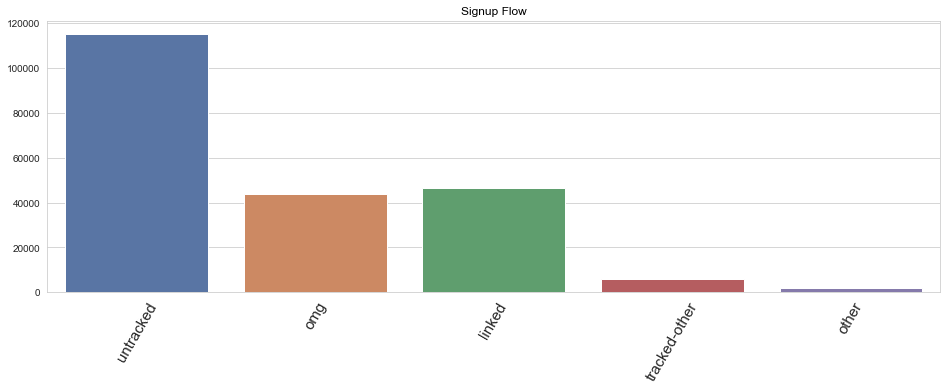

In [234]:
plt.figure(figsize=(16,5))
sns.countplot(x='first_affiliate_tracked', data=hotel, palette='deep')
plt.ylabel('')
plt.xlabel('')
plt.title('Signup Flow', color='black')
plt.xticks(rotation=60, size= 15)

plt.show()

# SIGNUP APP

In [235]:
# Unique values
print(hotel['signup_app'].unique())
print()
print(hotel['signup_app'].describe())
print()

['Web' 'Moweb' 'iOS' 'Android']

count     213449
unique         4
top          Web
freq      182715
Name: signup_app, dtype: object



In [236]:
# Value distribution

print(hotel['signup_app'].value_counts())
print()

Web        182715
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64



In [237]:
# Simplification of low values

app_dictionary = {'Web':'DesktopOS', 'iOS':'MobileOS', 'Android':'MobileOS','Moweb':'other'}

hotel['signup_app']=hotel['signup_app'].replace(app_dictionary)
print(hotel['signup_app'].unique())
print()

['DesktopOS' 'other' 'MobileOS']



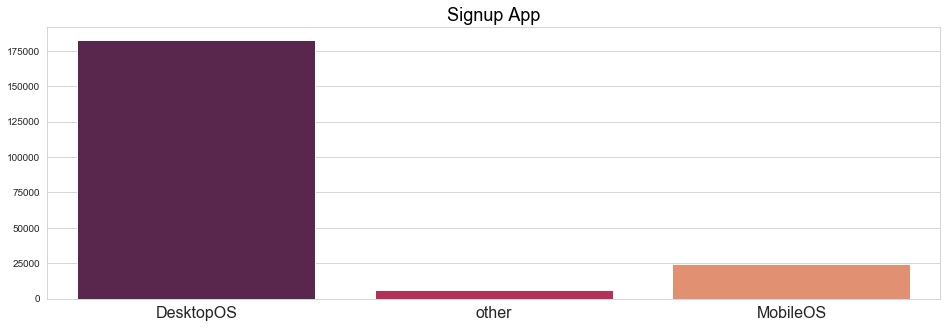

In [238]:
#Visualiation 

plt.figure(figsize=(16,5))
sns.countplot(x='signup_app', data=hotel, palette='rocket')
plt.ylabel('')
plt.xlabel('')
plt.title('Signup App', color='black',size= 18)
plt.xticks(size= 16)

plt.show()

 # FIRST DEVICE TYPE


In [239]:
# Unique values
print(hotel['first_device_type'].unique())
print()
print(hotel['first_device_type'].describe())
print()

['Windows Desktop' 'Mac Desktop' 'iPhone' 'Other/Unknown'
 'Desktop (Other)' 'Android Tablet' 'iPad' 'Android Phone'
 'SmartPhone (Other)']

count          213449
unique              9
top       Mac Desktop
freq            89598
Name: first_device_type, dtype: object



In [240]:
# Value distribution

print(hotel['first_device_type'].value_counts(normalize=True))
print()

Mac Desktop           0.419763
Windows Desktop       0.340672
iPhone                0.097255
iPad                  0.067178
Other/Unknown         0.049974
Android Phone         0.013132
Android Tablet        0.006053
Desktop (Other)       0.005617
SmartPhone (Other)    0.000356
Name: first_device_type, dtype: float64



In [241]:
#Simplification of low values

device_type_dict = {'Mac Desktop':'Desktop', 'Windows Desktop':'Desktop','iPhone':'Mobile', 'iPad':'Mobile',
                   'Android Phone':'SmartPhone (Other)', 'Android Phone':'Mobile', 'Android Tablet':'Mobile',
                   'Desktop (Other)':'Desktop', 'SmartPhone (Other)':'Mobile', 'Other/Unknown':'unknown'}

hotel['first_device_type'] = hotel['first_device_type'].replace(device_type_dict)
print(hotel['first_device_type'].unique())

['Desktop' 'Mobile' 'unknown']


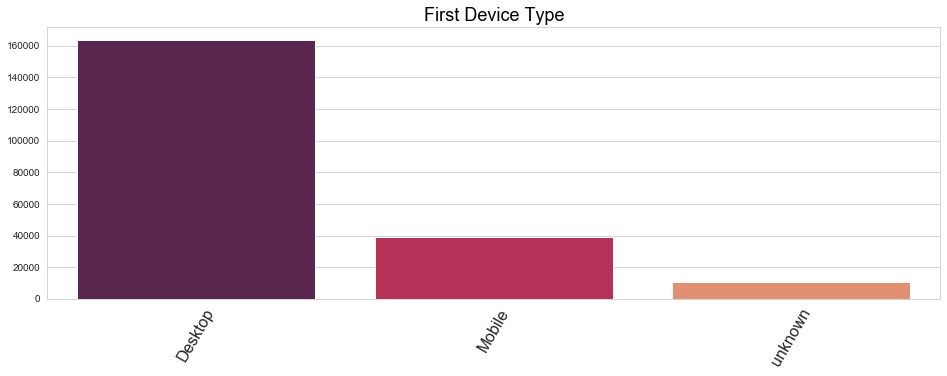

In [242]:
# A visualization

plt.figure(figsize=(16,5))
sns.countplot(x='first_device_type', data=hotel, palette='rocket')
plt.ylabel('')
plt.xlabel('')
plt.title('First Device Type', color='black',size= 18)
plt.xticks(rotation= 60,size= 16)

plt.show()

# FIRST BROWSER

In [243]:
# Unique values

print(hotel['first_browser'].unique())
print()
print(hotel['first_browser'].describe())

['IE' 'Firefox' 'Chrome' 'Safari' '-unknown-' 'Mobile Safari'
 'Chrome Mobile' 'RockMelt' 'Chromium' 'Android Browser' 'AOL Explorer'
 'Palm Pre web browser' 'Mobile Firefox' 'Opera' 'TenFourFox' 'IE Mobile'
 'Apple Mail' 'Silk' 'Camino' 'Arora' 'BlackBerry Browser' 'SeaMonkey'
 'Iron' 'Sogou Explorer' 'IceWeasel' 'Opera Mini' 'SiteKiosk' 'Maxthon'
 'Kindle Browser' 'CoolNovo' 'Conkeror' 'wOSBrowser' 'Google Earth'
 'Crazy Browser' 'Mozilla' 'OmniWeb' 'PS Vita browser' 'NetNewsWire'
 'CometBird' 'Comodo Dragon' 'Flock' 'Pale Moon' 'Avant Browser'
 'Opera Mobile' 'Yandex.Browser' 'TheWorld Browser' 'SlimBrowser' 'Epic'
 'Stainless' 'Googlebot' 'Outlook 2007' 'IceDragon']

count     213449
unique        52
top       Chrome
freq       63843
Name: first_browser, dtype: object


In [244]:
# Value distribution

print(hotel['first_browser'].value_counts(normalize=True))

Chrome          0.299102
Safari          0.211615
Firefox         0.157672
-unknown-       0.127740
IE              0.098703
                  ...   
Google Earth    0.000005
Stainless       0.000005
Conkeror        0.000005
NetNewsWire     0.000005
Epic            0.000005
Name: first_browser, Length: 52, dtype: float64


In [245]:
# Simplification of low values

browser_dictionary ={'Chrome Mobile':'other', 'RockMelt':'other', 'Chromium':'other', 'Android Browser':'other',
                     'AOL Explorer':'other','Palm Pre web browser':'other', 'Mobile Firefox':'other', 'Opera':'other',
                     'TenFourFox':'other', 'IE Mobile':'other','Apple Mail' :'other','Silk' :'other',
                     'Camino' :'other','Arora' :'other','BlackBerry Browser':'other',
                     'SeaMonkey':'other','Iron' :'other','Sogou Explorer':'other', 'IceWeasel' :'other',
                     'Opera Mini' :'other','SiteKiosk':'other', 'Maxthon':'other','Kindle Browser':'other',
                     'CoolNovo' :'other','Conkeror' :'other','wOSBrowser':'other', 'Google Earth':'other',
                     'Crazy Browser':'other', 'Mozilla':'other', 'OmniWeb':'other', 'PS Vita browser':'other',
                     'NetNewsWire':'other','CometBird':'other','Comodo Dragon' :'other',
                     'Flock' :'other','Pale Moon' :'other','Avant Browser':'other', 'Opera Mobile' :'other',
                     'Yandex.Browser':'other', 'TheWorld Browser':'other', 'SlimBrowser' :'other',
                     'Epic':'other', 'Stainless':'other', 'Googlebot':'other',
                     'Outlook 2007' :'other','IceDragon':'other', 'Mobile Safari':'other', '-unknown-':'unknown'}

hotel['first_browser'] = hotel['first_browser'].replace(browser_dictionary)
print(hotel['first_browser'].unique())

['IE' 'Firefox' 'Chrome' 'Safari' 'unknown' 'other']


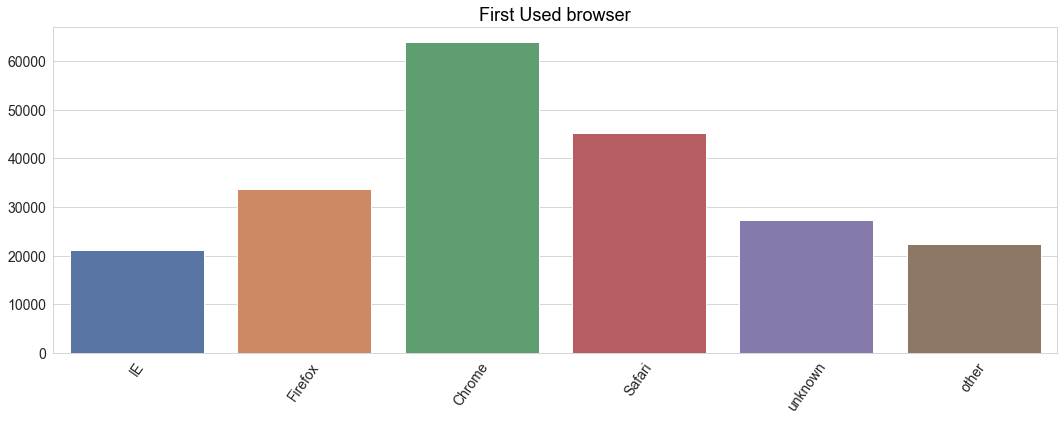

In [246]:
# A visualisation

plt.figure(figsize=(18,6))
sns.countplot(x='first_browser', data=hotel, palette='deep')
plt.ylabel('')
plt.xlabel('')
plt.title('First Used browser', color='black',size= 18)
plt.xticks(rotation= 55,size= 14)
plt.yticks(size=14)

plt.show()

# COUNTRY DESTINATION

In [247]:
# Unique values

print(hotel['country_destination'].unique())
print()
print(hotel['country_destination'].describe())

['US' 'other' 'NDF' 'FR' 'CA' 'GB' 'ES' 'IT' 'PT' 'NL' 'DE' 'AU']

count     213449
unique        12
top          NDF
freq      124541
Name: country_destination, dtype: object


In [248]:
# Value distribution

print(hotel['country_destination'].value_counts(normalize=True))

NDF      0.583470
US       0.292229
other    0.047290
FR       0.023533
IT       0.013282
           ...   
CA       0.006690
DE       0.004971
NL       0.003570
AU       0.002525
PT       0.001017
Name: country_destination, Length: 12, dtype: float64


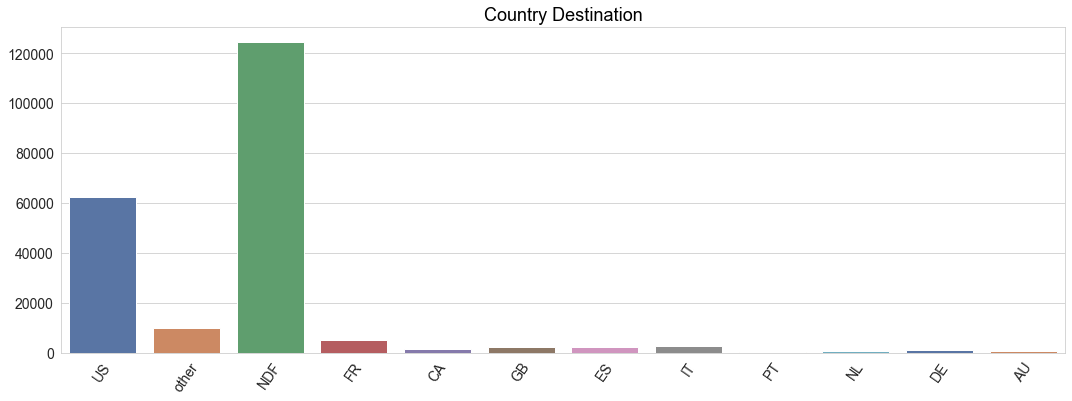

In [249]:
# Visualization
plt.figure(figsize=(18,6))
sns.countplot(x='country_destination', data=hotel, palette='deep')
plt.ylabel('')
plt.xlabel('')
plt.title('Country Destination', color='black',size= 18)
plt.xticks(rotation= 55,size= 14)
plt.yticks(size=14)

plt.show()

In [250]:
# Creates a new file for the machine learning steps

columns_for_csv = hotel.keys()
clean = pd.DataFrame(hotel, columns=columns_for_csv)
clean.to_csv('booking_cleaned.csv', index=False)

In [251]:
df = pd.read_csv('booking_cleaned.csv')
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,4ft3gnwmtx,2010-09-28,2009-06-09,2010-08-02,female,56.0,basic,3,en,direct,direct,untracked,DesktopOS,Desktop,IE,US
1,bjjt8pjhuk,2011-12-05,2009-10-31,2012-09-08,female,42.0,facebook,0,en,direct,direct,untracked,DesktopOS,Desktop,Firefox,other
2,87mebub9p4,2010-09-14,2009-12-08,2010-02-18,other,41.0,basic,0,en,direct,direct,untracked,DesktopOS,Desktop,Chrome,US
3,osr2jwljor,2010-01-01,2010-01-01,2010-01-02,other,34.0,basic,0,en,other,other,omg,DesktopOS,Desktop,Chrome,US
4,lsw9q7uk0j,2010-01-02,2010-01-02,2010-01-05,female,46.0,basic,0,en,other,craigslist,untracked,DesktopOS,Desktop,Safari,US



A similar approach is applied to the second file 'session'


In [252]:
session = pd.read_csv('sessions.csv') # Loading the file
session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [253]:
session.shape # Viewing the file shape

(10567737, 6)

In [254]:
# Look up for null total of null values in the date set
session.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [255]:
# Check for percentage of null values in the data set

nan_info = pd.DataFrame(session.isnull().sum()).reset_index()
nan_info.columns = ['feature_name','nan_cnt']
nan_info.sort_values(by = 'nan_cnt',ascending=False,inplace=True)
nan_info['nan_percentage'] = nan_info['nan_cnt']/len(session)
print(nan_info)

    feature_name  nan_cnt  nan_percentage
2    action_type  1126204        0.106570
3  action_detail  1126204        0.106570
5   secs_elapsed   136031        0.012872
1         action    79626        0.007535
0        user_id    34496        0.003264
4    device_type        0        0.000000


# USER ID

In [256]:
# Distribution of values
print(session['user_id'].value_counts())

mxqbh3ykxl    2722
0hjoc5q8nf    2644
mjbl6rrj52    2476
l5lgm3w5pc    2424
wg9413iaux    2362
              ... 
a40qjms4zu       1
5y8afixyb4       1
kzyylpj2og       1
zlovzkk884       1
3km27jj7n1       1
Name: user_id, Length: 135483, dtype: int64


In [257]:
# There isn't a way to replace the missing id values and
# it wil not be possible to join to together with the booking file,
# those are dropped

session['user_id'] = session.loc[session.user_id != 0, 'user_id']

In [258]:
# Renaming the for a value to match with booking file

session['id'] = session['user_id']
session.drop('user_id', axis=1, inplace=True)
session.head()

,action,action_type,action_detail,device_type,secs_elapsed,id
0,lookup,NaN,NaN,Windows Desktop,319.0,d1mm9tcy42
1,search_results,click,view_search_results,Windows Desktop,67753.0,d1mm9tcy42
2,lookup,NaN,NaN,Windows Desktop,301.0,d1mm9tcy42
3,search_results,click,view_search_results,Windows Desktop,22141.0,d1mm9tcy42
4,lookup,NaN,NaN,Windows Desktop,435.0,d1mm9tcy42


# ACTION

In [259]:
print(session.action.isnull().sum()) # Checking for null values in 'action'

79626


In [260]:
print(session.action.value_counts()) # Displaying the value distribution

show                         2768278
index                         843699
search_results                725226
personalize                   706824
search                        536057
                              ...   
nyan                               1
events                             1
plaxo_cb                           1
set_minimum_payout_amount          1
revert_to_admin                    1
Name: action, Length: 359, dtype: int64


In [261]:
# The missing values are filled with unknown

session['action'] = session['action'].fillna(value='unknown')
print(session.action.isnull().sum())

0


# ACTION

In [262]:
print(session.action.isnull().sum()) # Checking for null values in 'action'

0


In [263]:
print(session.action.value_counts()) # Displaying the value distribution

show                         2768278
index                         843699
search_results                725226
personalize                   706824
search                        536057
                              ...   
plaxo_cb                           1
deactivate                         1
sldf                               1
desks                              1
set_minimum_payout_amount          1
Name: action, Length: 360, dtype: int64


In [264]:
# The missing values are filled with unknown

session['action'] = session['action'].fillna(value='unknown')
print(session.action.isnull().sum())

0


# ACTION TYPE

In [265]:
print(session.action_type.value_counts()) # Displaying the value distribution

view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64


In [266]:
print(session.action_type.isnull().sum()) # Checking for null values

1126204


In [267]:
# Correcting the format, for one type of unknown and filling the missing values

session['action_type'] = session['action_type'].str.replace('-unknown-','unknown')
session['action_type'] = session['action_type'].fillna(value='unknown')
print(print(session['action_type'].unique()))

['unknown' 'click' 'data' 'view' 'submit' 'message_post' 'booking_request'
 'partner_callback' 'booking_response' 'modify']
None


In [268]:
print(session['action_type'].isnull().sum())

0


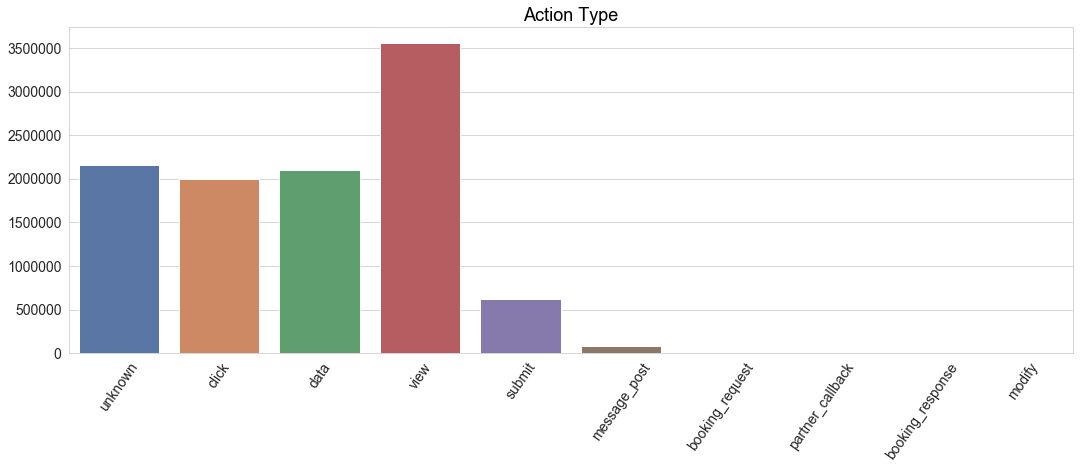

In [269]:
# A visualization

plt.figure(figsize=(18,6))
sns.countplot(x='action_type', data=session, palette='deep')
plt.ylabel('')
plt.xlabel('')
plt.title('Action Type', color='black',size= 18)
plt.xticks(rotation= 55,size= 14)
plt.yticks(size=14)
plt.show()

# ACTION DETAIL

In [270]:
print(session.action_detail.describe())

count                 9441533
unique                    155
top       view_search_results
freq                  1776885
Name: action_detail, dtype: object


In [271]:
print(session.action_detail.isnull().sum()) # Checking for null values

1126204


In [272]:
print(session.action_detail.value_counts()) # Displaying the value distribution

view_search_results         1776885
p3                          1376550
-unknown-                   1031141
wishlist_content_update      706824
user_profile                 656839
                             ...   
special_offer_field               3
host_refund_guest                 2
tos_2014                          2
host_respond_page                 2
host_standard_suspension          1
Name: action_detail, Length: 155, dtype: int64


At first, I wanted to simplify the action details and create a list of the main action but there are too many unique values. It was done partially manualy and became very time consuming.

In [273]:
# The missing values are filled with unknown category

session['action_detail'] = session['action_detail'].fillna(value='unknown').astype('category')
print(session['action_detail'].isnull().sum())

0


# DEVICE TYPE

In [274]:
print(session.device_type.isnull().sum())  # Checking for null values

0


In [275]:
print(session['device_type'].unique()) # Unique values

['Windows Desktop' '-unknown-' 'Mac Desktop' 'Android Phone' 'iPhone'
 'iPad Tablet' 'Android App Unknown Phone/Tablet' 'Linux Desktop' 'Tablet'
 'Chromebook' 'Blackberry' 'iPodtouch' 'Windows Phone' 'Opera Phone']


In [276]:
print(session['device_type'].value_counts(normalize=True))  # Displaying the value distribution

Mac Desktop        0.340119
Windows Desktop    0.251571
iPhone             0.199194
Android Phone      0.079453
iPad Tablet        0.064670
                     ...   
Chromebook         0.002115
iPodtouch          0.000776
Windows Phone      0.000194
Blackberry         0.000093
Opera Phone        0.000006
Name: device_type, Length: 14, dtype: float64


In [277]:
# Correcting the format, for one type of unknown and filling the missing values

session['device_type'] = session['device_type'].str.replace('-unknown-','unknown')
print(session['device_type'].unique())

['Windows Desktop' 'unknown' 'Mac Desktop' 'Android Phone' 'iPhone'
 'iPad Tablet' 'Android App Unknown Phone/Tablet' 'Linux Desktop' 'Tablet'
 'Chromebook' 'Blackberry' 'iPodtouch' 'Windows Phone' 'Opera Phone']


In [278]:
# A dictionary to create two types of categories to simplify: mobile, desktop and unknown

mapping_dict = {'Windows Desktop':'Desktop', 'unknown':'unknown', 'Mac Desktop': 'Desktop',
               'Android Phone':'Mobile','iPad Tablet':'Mobile', 'Android App Unknown Phone/Tablet':'Mobile',
               'Linux Desktop':'Desktop', 'Tablet':'Mobile','Chromebook':'Desktop','Blackberry':'Mobile',
               'iPodtouch':'Mobile', 'Windows Phone':'Mobile','Opera Phone':'Mobile',
               'iPhone':'Mobile'}

session['device_type'] = session['device_type'].replace(mapping_dict)
print(session['device_type'].unique()) # new unique values

['Desktop' 'unknown' 'Mobile']


(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000., 7000000.]),
 <a list of 8 Text yticklabel objects>)

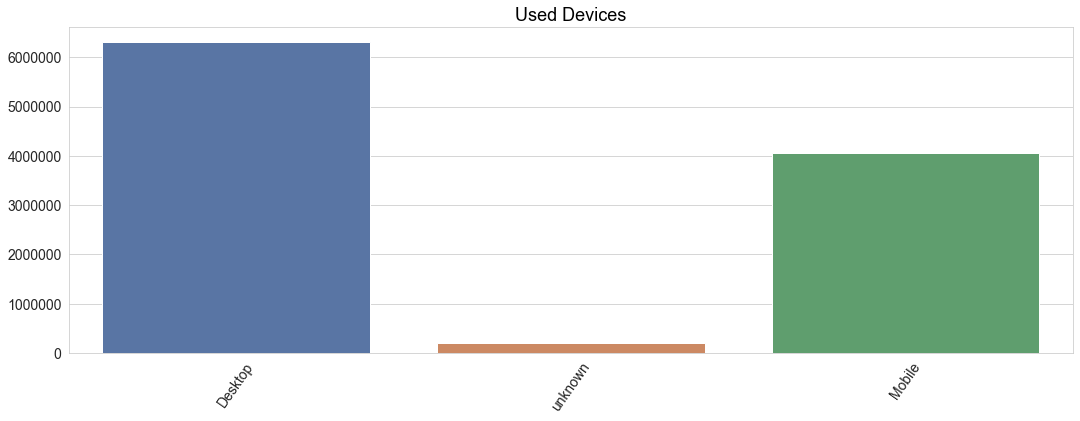

In [279]:
# A visualization

plt.figure(figsize=(18,6))
sns.countplot(x='device_type', data=session, palette='deep')
plt.ylabel('')
plt.xlabel('')
plt.title('Used Devices', color='black',size= 18)
plt.xticks(rotation= 55,size= 14)
plt.yticks(size=14)
#plt.show()

To be able to join the session the it is grouped by id and will allow to create some features. 

In [280]:
agg_dict={
    'action':['nunique'],'action_detail':['nunique'],'action_type':['nunique'],'device_type':['nunique'],
    'secs_elapsed':['min','max','sum','mean','median','std']}

# The categorical columns are aggregated and their types as number of unique actions,
# also secs_elapsed as a feature insight

In [281]:
agged = session.groupby(['id']).agg(agg_dict) # Group by

In [282]:
agged.columns = agged.columns.droplevel(0) # Treats the multilevel column name

In [283]:
# Change of the column names into a understandable way
agged.keys().values[[0,1,2,3,4,5,6,7,8,9]] = ['action_nunique','action_type_nunique','action_detail_nunique',
                                  'device_type_nunique','min_secs_elapsed','max_secs_elapsed',
                                 'sum_secs_elapsed','mean_secs_elapsed','median_secs_elapsed',
                                 'std_secs_elapsed']
agged.head()

,action_nunique,action_type_nunique,action_detail_nunique,device_type_nunique,min_secs_elapsed,max_secs_elapsed,sum_secs_elapsed,mean_secs_elapsed,median_secs_elapsed,std_secs_elapsed
id,,,,,,,,,,
00023iyk9l,14,14,7,2,0.0,567165.0,867896.0,22253.743590,850.0,92242.561900
0010k6l0om,11,9,5,1,3.0,127898.0,586543.0,9460.370968,948.5,22751.227918
001wyh0pz8,10,10,5,1,35.0,50548.0,282965.0,3179.382022,1105.0,6569.648182
0028jgx1x1,5,6,5,2,3.0,84636.0,297010.0,9900.333333,1614.0,18004.964337
002qnbzfs5,26,23,7,2,0.0,1418284.0,6487080.0,8232.335025,498.0,58110.646170


In [284]:
agged_column_names = agged.keys() # Columns for cleaned csv

session_cleaned = pd.DataFrame(agged, columns=agged_column_names) # Creates a new csv file
session_cleaned.to_csv('session_cleaned.csv', index=True)

In [285]:
df = pd.read_csv('session_cleaned.csv') # A look at the newly created file
df.head()

,id,action_nunique,action_type_nunique,action_detail_nunique,device_type_nunique,min_secs_elapsed,max_secs_elapsed,sum_secs_elapsed,mean_secs_elapsed,median_secs_elapsed,std_secs_elapsed
0,00023iyk9l,14,14,7,2,0.0,567165.0,867896.0,22253.743590,850.0,92242.561900
1,0010k6l0om,11,9,5,1,3.0,127898.0,586543.0,9460.370968,948.5,22751.227918
2,001wyh0pz8,10,10,5,1,35.0,50548.0,282965.0,3179.382022,1105.0,6569.648182
3,0028jgx1x1,5,6,5,2,3.0,84636.0,297010.0,9900.333333,1614.0,18004.964337
4,002qnbzfs5,26,23,7,2,0.0,1418284.0,6487080.0,8232.335025,498.0,58110.646170


MAIN PIPELINE 

In [286]:
booking = pd.read_csv('booking_cleaned.csv') # Loading both files
session = pd.read_csv('session_cleaned.csv')

In [287]:
booking.head() # Brief look at the files

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,4ft3gnwmtx,2010-09-28,2009-06-09,2010-08-02,female,56.0,basic,3,en,direct,direct,untracked,DesktopOS,Desktop,IE,US
1,bjjt8pjhuk,2011-12-05,2009-10-31,2012-09-08,female,42.0,facebook,0,en,direct,direct,untracked,DesktopOS,Desktop,Firefox,other
2,87mebub9p4,2010-09-14,2009-12-08,2010-02-18,other,41.0,basic,0,en,direct,direct,untracked,DesktopOS,Desktop,Chrome,US
3,osr2jwljor,2010-01-01,2010-01-01,2010-01-02,other,34.0,basic,0,en,other,other,omg,DesktopOS,Desktop,Chrome,US
4,lsw9q7uk0j,2010-01-02,2010-01-02,2010-01-05,female,46.0,basic,0,en,other,craigslist,untracked,DesktopOS,Desktop,Safari,US


In [288]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213449 entries, 0 to 213448
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213449 non-null  object 
 1   date_account_created     213449 non-null  object 
 2   timestamp_first_active   213449 non-null  object 
 3   date_first_booking       213449 non-null  object 
 4   gender                   213449 non-null  object 
 5   age                      213449 non-null  float64
 6   signup_method            213449 non-null  object 
 7   signup_flow              213449 non-null  int64  
 8   language                 213449 non-null  object 
 9   affiliate_channel        213449 non-null  object 
 10  affiliate_provider       213449 non-null  object 
 11  first_affiliate_tracked  213449 non-null  object 
 12  signup_app               213449 non-null  object 
 13  first_device_type        213449 non-null  object 
 14  firs

In [289]:
session.head()

,id,action_nunique,action_type_nunique,action_detail_nunique,device_type_nunique,min_secs_elapsed,max_secs_elapsed,sum_secs_elapsed,mean_secs_elapsed,median_secs_elapsed,std_secs_elapsed
0,00023iyk9l,14,14,7,2,0.0,567165.0,867896.0,22253.743590,850.0,92242.561900
1,0010k6l0om,11,9,5,1,3.0,127898.0,586543.0,9460.370968,948.5,22751.227918
2,001wyh0pz8,10,10,5,1,35.0,50548.0,282965.0,3179.382022,1105.0,6569.648182
3,0028jgx1x1,5,6,5,2,3.0,84636.0,297010.0,9900.333333,1614.0,18004.964337
4,002qnbzfs5,26,23,7,2,0.0,1418284.0,6487080.0,8232.335025,498.0,58110.646170


In [290]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135483 entries, 0 to 135482
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     135483 non-null  object 
 1   action_nunique         135483 non-null  int64  
 2   action_type_nunique    135483 non-null  int64  
 3   action_detail_nunique  135483 non-null  int64  
 4   device_type_nunique    135483 non-null  int64  
 5   min_secs_elapsed       134057 non-null  float64
 6   max_secs_elapsed       134057 non-null  float64
 7   sum_secs_elapsed       135483 non-null  float64
 8   mean_secs_elapsed      134057 non-null  float64
 9   median_secs_elapsed    134057 non-null  float64
 10  std_secs_elapsed       130796 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 11.4+ MB


In [291]:
print('Number of unique target values', booking.country_destination.nunique())

Number of unique target values 12


In [292]:
#  Comparison of both files
print('booking', booking.shape)
print('session', session.shape)

booking (213449, 16)
session (135483, 11)


We can see there are almost half missing ids in the booking file compare to session there's going to be significant drop in rows

In [293]:
# Join of the two tables together on id

main_df = session.merge(booking, on='id', how='inner')
main_df.head(10)

,id,action_nunique,action_type_nunique,action_detail_nunique,device_type_nunique,min_secs_elapsed,max_secs_elapsed,sum_secs_elapsed,mean_secs_elapsed,median_secs_elapsed,...,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,00023iyk9l,14,14,7,2,0.0,567165.0,867896.0,22253.743590,850.0,...,basic,0,en,direct,direct,omg,DesktopOS,Desktop,Safari,US
1,001wyh0pz8,10,10,5,1,35.0,50548.0,282965.0,3179.382022,1105.0,...,basic,23,en,direct,direct,untracked,MobileOS,unknown,unknown,NDF
2,0028jgx1x1,5,6,5,2,3.0,84636.0,297010.0,9900.333333,1614.0,...,basic,0,en,direct,direct,linked,other,Mobile,other,NDF
3,002qnbzfs5,26,23,7,2,0.0,1418284.0,6487080.0,8232.335025,498.0,...,facebook,25,en,direct,direct,linked,MobileOS,Mobile,other,US
4,0035hobuyj,21,18,6,1,0.0,1215345.0,5724670.0,11730.881148,865.0,...,basic,0,en,sem-brand,google,omg,DesktopOS,Desktop,Safari,US
5,00389675gq,39,32,6,2,3.0,375543.0,2605711.0,14805.176136,963.0,...,basic,0,en,other,other,untracked,DesktopOS,unknown,unknown,NDF
6,003iamz20l,9,10,5,1,0.0,312360.0,1590236.0,9816.271605,380.0,...,basic,25,en,direct,direct,untracked,MobileOS,Mobile,unknown,NDF
7,005jc3nbmb,12,12,6,2,49.0,1473741.0,2793945.0,111757.800000,4179.0,...,basic,0,en,direct,direct,untracked,DesktopOS,Mobile,other,NDF
8,006mls2sjw,21,17,5,1,2.0,681102.0,2424268.0,12496.226804,883.0,...,basic,0,en,sem-brand,google,untracked,DesktopOS,Desktop,Safari,ES
9,006t3vhawl,18,16,6,1,23.0,159224.0,815416.0,31362.153846,3340.5,...,basic,0,en,sem-brand,google,omg,DesktopOS,Mobile,other,US


In [294]:
# Using the inner join decreases the the data to half the size in case of

print(main_df.shape)
print()
print(main_df.info())

(73815, 26)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73815 entries, 0 to 73814
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       73815 non-null  object 
 1   action_nunique           73815 non-null  int64  
 2   action_type_nunique      73815 non-null  int64  
 3   action_detail_nunique    73815 non-null  int64  
 4   device_type_nunique      73815 non-null  int64  
 5   min_secs_elapsed         72631 non-null  float64
 6   max_secs_elapsed         72631 non-null  float64
 7   sum_secs_elapsed         73815 non-null  float64
 8   mean_secs_elapsed        72631 non-null  float64
 9   median_secs_elapsed      72631 non-null  float64
 10  std_secs_elapsed         69850 non-null  float64
 11  date_account_created     73815 non-null  object 
 12  timestamp_first_active   73815 non-null  object 
 13  date_first_booking       73815 non-null  object 
 14  gender   

Addition of date features before they are dropped for the model train.

Trying to use differences between date_account_created', 'timestamp_first_active' and'date_first_booking' does not give a useful outcome, it is high in negative values. It would also lead to loosing more values.

In [295]:
# Date conversion date_account_created

main_df.date_account_created = pd.to_datetime(main_df.date_account_created) # Date conversion

In [296]:
# Creating new columns for day, month, year of account creation

main_df['dayofweek_account_created'] = main_df.date_account_created.dt.dayofweek
main_df['day_account_created'] = main_df.date_account_created.dt.day
main_df['day_of_year_account_created'] = main_df.date_account_created.dt.dayofyear
main_df['month_account_created'] = main_df.date_account_created.dt.month
main_df['year_account_created'] = main_df.date_account_created.dt.year

In [297]:
# Date conversion timestamp_first_active

main_df.timestamp_first_active = pd.to_datetime(main_df.timestamp_first_active)

In [298]:
# Creating new columns for day, month, year of first activity

main_df['dayofweek_first_active'] = main_df.timestamp_first_active.dt.dayofweek
main_df['day_first_active'] = main_df.timestamp_first_active.dt.day
main_df['day_of_year_first_active'] = main_df.timestamp_first_active.dt.dayofyear
main_df['month_first_active'] = main_df.timestamp_first_active.dt.month
main_df['year_first_active'] = main_df.timestamp_first_active.dt.year

In [299]:
# Date conversion date_first_booking

main_df.date_first_booking = pd.to_datetime(main_df.date_first_booking)

In [300]:
# Creating new columns for day, month, year of first activity
main_df['dayofweek_first_active'] = main_df.timestamp_first_active.dt.dayofweek
main_df['day_first_active'] = main_df.timestamp_first_active.dt.day
main_df['day_of_year_first_active'] = main_df.timestamp_first_active.dt.dayofyear
main_df['month_first_active'] = main_df.timestamp_first_active.dt.month
main_df['year_first_active'] = main_df.timestamp_first_active.dt.year

In [301]:
# Date conversion date_first_booking

main_df.date_first_booking = pd.to_datetime(main_df.date_first_booking)

In [302]:
# Creating new columns for day, month, year of first booking

main_df['dayofweek_first_booking'] = main_df.date_first_booking.dt.dayofweek
main_df['day_of_year_first_booking'] = main_df.date_first_booking.dt.dayofyear
main_df['day_first_booking'] = main_df.date_first_booking.dt.day
main_df['month_first_booking'] = main_df.date_first_booking.dt.month
main_df['year_first_booking'] = main_df.date_first_booking.dt.year

In [303]:
# Adding seasons of the year

bins = [0, 91, 183, 275, 366]
labels=['Winter', 'Spring', 'Summer', 'Fall']

main_df['seasons'] = pd.cut(main_df['day_of_year_first_booking'] + 11 - 366*(main_df['day_of_year_first_booking'] > 355), bins=bins, labels=labels)
print('Seasons of the year distribution: ') 
main_df['seasons'].value_counts(normalize=True)

Seasons of the year distribution: 


Spring    0.491662
Winter    0.311725
Summer    0.147219
Fall      0.049394
Name: seasons, dtype: float64

In [304]:
# Age categories feature

cut_labels_7 = ['teens','twenties', 'thirties','fourties', 'fifties', 'sixties', 'retired']
cut_bins = [ -1, 20, 30, 40, 50, 60, 70, 100]
main_df['age_groups'] = pd.cut(main_df['age'], bins=cut_bins, labels=cut_labels_7)

In [305]:
print('Distribution of age groups:')
print(main_df['age_groups'].value_counts(normalize=True))

Distribution of age groups:
thirties    0.624670
twenties    0.221676
fourties    0.073210
fifties     0.041238
sixties     0.018885
teens       0.014943
retired     0.005378
Name: age_groups, dtype: float64


In [306]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73815 entries, 0 to 73814
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           73815 non-null  object        
 1   action_nunique               73815 non-null  int64         
 2   action_type_nunique          73815 non-null  int64         
 3   action_detail_nunique        73815 non-null  int64         
 4   device_type_nunique          73815 non-null  int64         
 5   min_secs_elapsed             72631 non-null  float64       
 6   max_secs_elapsed             72631 non-null  float64       
 7   sum_secs_elapsed             73815 non-null  float64       
 8   mean_secs_elapsed            72631 non-null  float64       
 9   median_secs_elapsed          72631 non-null  float64       
 10  std_secs_elapsed             69850 non-null  float64       
 11  date_account_created         73815 non-nu

In [307]:
# Drop of the date features

main_df.drop('date_first_booking', axis=1, inplace=True)
main_df.drop('date_account_created', axis=1, inplace=True)
main_df.drop('timestamp_first_active', axis=1, inplace=True)

In [308]:
main_df.keys() # Check for the new features and

Index(['id', 'action_nunique', 'action_type_nunique', 'action_detail_nunique',
       'device_type_nunique', 'min_secs_elapsed', 'max_secs_elapsed',
       'sum_secs_elapsed', 'mean_secs_elapsed', 'median_secs_elapsed',
       'std_secs_elapsed', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'dayofweek_account_created',
       'day_account_created', 'day_of_year_account_created',
       'month_account_created', 'year_account_created',
       'dayofweek_first_active', 'day_first_active',
       'day_of_year_first_active', 'month_first_active', 'year_first_active',
       'dayofweek_first_booking', 'day_of_year_first_booking',
       'day_first_booking', 'month_first_booking', 'year_first_booking',
       'seasons', 'age_groups'],
      dtype='object')

In [309]:
# Check for null values

print(main_df.isnull().sum())

id                       0
action_nunique           0
action_type_nunique      0
action_detail_nunique    0
device_type_nunique      0
                        ..
day_first_booking        0
month_first_booking      0
year_first_booking       0
seasons                  0
age_groups               0
Length: 40, dtype: int64


In [310]:
print(main_df.dtypes.unique()) # These are the data types we have

[dtype('O') dtype('int64') dtype('float64')
 CategoricalDtype(categories=['Winter', 'Spring', 'Summer', 'Fall'], ordered=True)
 CategoricalDtype(categories=['teens', 'twenties', 'thirties', 'fourties', 'fifties',
                  'sixties', 'retired'],
                 ordered=True)]


In [311]:
# Prep. of categorical features for

categorical_features = [f for f in main_df.columns if main_df[f].dtype not in ['int64','float64']]
print('List of categorical features: ', categorical_features)

List of categorical features:  ['id', 'gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination', 'seasons', 'age_groups']


In [312]:
# Looking for any possible missing values

nan_info = pd.DataFrame(main_df[categorical_features].isnull().sum()).reset_index() # get columns which has NAN
nan_info.columns = ['column','cnt_nan']
nan_info.sort_values('cnt_nan',ascending=False,inplace=True)
print(nan_info)

                 column  cnt_nan
0                    id        0
1                gender        0
2         signup_method        0
3              language        0
4     affiliate_channel        0
..                  ...      ...
8     first_device_type        0
9         first_browser        0
10  country_destination        0
11              seasons        0
12           age_groups        0

[13 rows x 2 columns]


In [313]:
# Categorical feature encoding

for f in categorical_features:
    main_df[f] = LabelEncoder().fit_transform(main_df[f])

In [314]:
# Prep. of numeric features

numeric_features = [f for f in main_df.columns if (f not in categorical_features) and f not in ['id']]
print('List of numeric features: ',numeric_features)
print()


List of numeric features:  ['action_nunique', 'action_type_nunique', 'action_detail_nunique', 'device_type_nunique', 'min_secs_elapsed', 'max_secs_elapsed', 'sum_secs_elapsed', 'mean_secs_elapsed', 'median_secs_elapsed', 'std_secs_elapsed', 'age', 'signup_flow', 'dayofweek_account_created', 'day_account_created', 'day_of_year_account_created', 'month_account_created', 'year_account_created', 'dayofweek_first_active', 'day_first_active', 'day_of_year_first_active', 'month_first_active', 'year_first_active', 'dayofweek_first_booking', 'day_of_year_first_booking', 'day_first_booking', 'month_first_booking', 'year_first_booking']



In [315]:
# Looking for any possible missing values

nan_info = pd.DataFrame(main_df[numeric_features].isnull().sum()).reset_index() # get nan info for numerical features
nan_info.columns = ['column','cnt_nan']
nan_info.sort_values('cnt_nan',ascending=False,inplace=True)
print(nan_info)
print()


                   column  cnt_nan
9        std_secs_elapsed     3965
4        min_secs_elapsed     1184
5        max_secs_elapsed     1184
7       mean_secs_elapsed     1184
8     median_secs_elapsed     1184
..                    ...      ...
10                    age        0
6        sum_secs_elapsed        0
3     device_type_nunique        0
2   action_detail_nunique        0
26     year_first_booking        0

[27 rows x 2 columns]



In [316]:
# List of columns with zero values
cols_with_zeros = nan_info.loc[nan_info.cnt_nan>0]['column'].values
print('List of column names with zero values: ', cols_with_zeros)

List of column names with zero values:  ['std_secs_elapsed' 'min_secs_elapsed' 'max_secs_elapsed'
 'mean_secs_elapsed' 'median_secs_elapsed']


In [317]:
# Filling the missing values with mean
for f in cols_with_zeros:
    main_df[f] = main_df[f].fillna(main_df[f].mean())
print()
print(main_df.isnull().sum().sum())


0


In [319]:
# BENCHMARK INPUT
main_df.head()

,id,action_nunique,action_type_nunique,action_detail_nunique,device_type_nunique,min_secs_elapsed,max_secs_elapsed,sum_secs_elapsed,mean_secs_elapsed,median_secs_elapsed,...,day_of_year_first_active,month_first_active,year_first_active,dayofweek_first_booking,day_of_year_first_booking,day_first_booking,month_first_booking,year_first_booking,seasons,age_groups
0,0,14,14,7,2,0.0,567165.0,867896.0,22253.743590,850.0,...,134,5,2014,2,134,14,5,2014,1,5
1,1,10,10,5,1,35.0,50548.0,282965.0,3179.382022,1105.0,...,114,4,2014,6,124,4,5,2014,1,5
2,2,5,6,5,2,3.0,84636.0,297010.0,9900.333333,1614.0,...,172,6,2014,5,3,3,1,2015,3,5
3,3,26,23,7,2,0.0,1418284.0,6487080.0,8232.335025,498.0,...,116,4,2014,5,116,26,4,2014,1,6
4,4,21,18,6,1,0.0,1215345.0,5724670.0,11730.881148,865.0,...,2,1,2014,5,4,4,1,2014,3,5


In [320]:
# To get X and y, X input, y target

features = [f for f in main_df.columns if f not in ['id','country_destination']]
X = main_df[features]
y = main_df['country_destination']
print('X.shape,len(y)', X.shape,len(y))

X.shape,len(y) (73815, 38) 73815


In [321]:
# Split out for validation, using train_test_split
X_train,X_valid, y_train,y_valid = train_test_split(X,y,shuffle=True,random_state=10, test_size=0.25)
print('X_train.shape: ', X_train.shape, 'X_valid.shape: ',X_valid.shape, 'len(y_train): ',len(y_train),'len(y_valid) :', len(y_valid))

X_train.shape:  (55361, 38) X_valid.shape:  (18454, 38) len(y_train):  55361 len(y_valid) : 18454


In [322]:
X_train,X_test, y_train,y_test = train_test_split(X,y,shuffle=True,random_state=10, test_size=0.25)
print('X_train.shape: ', X_train.shape,'X_test.shape: ', X_test.shape, 'len(y_train): ', len(y_train), 'len(y_test): ', len(y_test))

X_train.shape:  (55361, 38) X_test.shape:  (18454, 38) len(y_train):  55361 len(y_test):  18454


In [323]:
# Index reset

X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [325]:
# LightGBM model is already loaded

print(y_train)

0        10
1         7
2         7
3        11
4         3
         ..
55356     7
55357     3
55358     7
55359    10
55360     7
Name: country_destination, Length: 55361, dtype: int64

In [326]:
# Model parameter setting

model_lgb = lgb.LGBMClassifier(
            n_jobs=4,
            n_estimators=100000,
            boost_from_average='false',
            learning_rate=0.01,
            objective='multiclass',
            metric='multi_logloss',
            num_class=12,
            num_leaves=32,
            num_threads=4,
            max_depth=10,
            tree_learner = "serial",
            feature_fraction = 0.7,
            bagging_freq = 5,
            bagging_fraction = 0.7,
            min_data_in_leaf=10000,
            silent=-1,
            verbose=-1,
            max_bin = 255,
            bagging_seed = 11,
            )

In [327]:
# Fitting the model
model_lgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric = 'multi_logloss', verbose=500, early_stopping_rounds = 300)

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=10000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10000
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] num_threads is set=4, n_jobs=4 will be ignored. Current value: num_threads=4
Training until validation scores don't improve for 300 rounds
[500]	training's multi_logloss: 0.992405	valid_1's multi_logloss: 1.00873
[1000]	training's multi_logloss: 0.977461	valid_1's multi_logloss: 1.00007
[1500]	training's multi_logloss: 0.970272	valid_1's multi_logloss: 0.997244
[2000]	training's multi_logloss: 0.964737	valid_1's multi_logloss: 0.995673
[2500]	training's multi_logloss: 0.960438	valid_1's multi_logl

LGBMClassifier(bagging_fraction=0.7, bagging_freq=5, bagging_seed=11,
               boost_from_average='false', feature_fraction=0.7,
               learning_rate=0.01, max_bin=255, max_depth=10,
               metric='multi_logloss', min_data_in_leaf=10000,
               n_estimators=100000, n_jobs=4, num_class=12, num_leaves=32,
               num_threads=4, objective='multiclass', silent=-1,
               tree_learner='serial', verbose=-1)

In [328]:
# Defining  RandomForestRegressor and train the model

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [329]:
y_pred = rf_reg.predict(X_test)

In [330]:
rsquare_score = rf_reg.score(X_train,y_train)
print('R^2: {}'.format(rsquare_score))

R^2: 0.8713000760105604


In [331]:
cv_r2_scores_rf = cross_val_score(rf_reg, X, y, cv=5,scoring='r2')
print(cv_r2_scores_rf)

[0.08075129 0.07999455 0.08798108 0.0760992  0.07586189]


In [332]:
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

Mean 5-Fold R Squared: 0.08013760344220562


In [333]:
# Feature importance definition of a data set

X, y = make_classification(n_samples=1000, n_features=37, n_informative=5, random_state=1)

In [334]:
# Definition the model

model = DecisionTreeClassifier()

In [335]:
# Fit the model

model.fit(X, y) 

DecisionTreeClassifier()

In [336]:
#  Getting the importance

importance = model.feature_importances_

In [337]:
# Summary of feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00568
Feature: 1, Score: 0.01006
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00744
Feature: 4, Score: 0.01448
Feature: 5, Score: 0.00331
Feature: 6, Score: 0.00702
Feature: 7, Score: 0.00072
Feature: 8, Score: 0.19888
Feature: 9, Score: 0.00765
Feature: 10, Score: 0.00241
Feature: 11, Score: 0.00337
Feature: 12, Score: 0.01569
Feature: 13, Score: 0.07423
Feature: 14, Score: 0.03441
Feature: 15, Score: 0.00910
Feature: 16, Score: 0.00622
Feature: 17, Score: 0.06339
Feature: 18, Score: 0.00519
Feature: 19, Score: 0.01526
Feature: 20, Score: 0.00480
Feature: 21, Score: 0.01604
Feature: 22, Score: 0.00392
Feature: 23, Score: 0.00398
Feature: 24, Score: 0.00267
Feature: 25, Score: 0.00377
Feature: 26, Score: 0.00549
Feature: 27, Score: 0.00186
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00702
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.03878
Feature: 32, Score: 0.09435
Feature: 33, Score: 0.31337
Feature: 34, Score: 0.00737
Feature: 35, Score: 0.01209
Fe

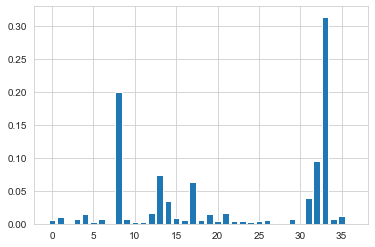

In [338]:
# Feature importance plot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Considering the feature importance plot, removing some features may improve the model.